In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


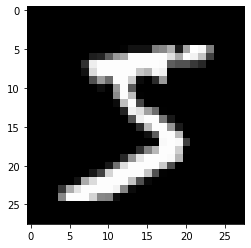

In [5]:
plt.imshow(x_train[0],cmap='gray')

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
#Normalize the data
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#input_size=batch_size,widht,hieght,channels
x_train = x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [12]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation = 'relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [16]:
#Train the model
model_fit=model.fit(x_train, y_train,validation_split=0.2,epochs=3,batch_size=64)

Epoch 1/3
750/750 [==============================] - 88s 116ms/step - loss: 0.1619 - accuracy: 0.9509 - val_loss: 0.0565 - val_accuracy: 0.9839
Epoch 2/3
750/750 [==============================] - 90s 120ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0454 - val_accuracy: 0.9856
Epoch 3/3
750/750 [==============================] - 87s 116ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0426 - val_accuracy: 0.9877


In [17]:
print(model.metrics_names)
pred_label=(model.predict(x_test).argmax(axis=1))


['loss', 'accuracy']
313/313 [==============================] - 4s 14ms/step


In [18]:
from sklearn.metrics import classification_report, accuracy_score

In [19]:
print(classification_report(y_test,pred_label))
print("accuracy score =>", accuracy_score(y_test,pred_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

accuracy score => 0.9884


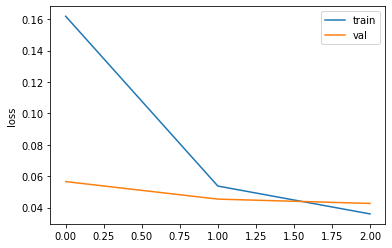

In [20]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit.history['val_loss'],label='val')
plt.legend()
plt.ylabel('loss')
plt.show()

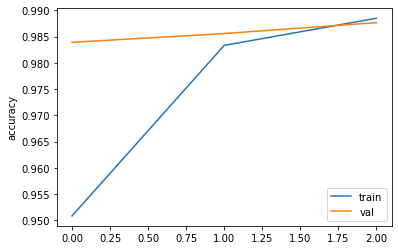

In [21]:
plt.plot(model_fit.history['accuracy'],label='train')
plt.plot(model_fit.history['val_accuracy'],label='val')
plt.legend()
plt.ylabel('accuracy')
plt.show()

In [22]:
#classification for dog and cat 
#multiclass classifcation for fruits